# dataclean_final

Combined cleaning and missing-value visualization derived from data_clean.

## Part 1: Cleaning & basic diagnostics
Hot100, other ranking files, and society info; exports are commented out.

In [1]:
# 通用导入与路径设置
# Common imports and path setup
import os
import pandas as pd
from termcolor import colored
from IPython.display import display, HTML


In [2]:
# 读取 Hot100 与 Charts 数据
# Load Hot100 and Charts data
path_hot100 = '../data/ranking_5/hot100.csv'
path_charts = '../data/ranking_5/charts.csv'

try:
    df_hot = pd.read_csv(path_hot100, dtype={4: str})
    df_charts = pd.read_csv(path_charts)
    print(colored(f"Success!Hot100 shape: {df_hot.shape}Charts shape: {df_charts.shape}", 'green'))
except FileNotFoundError:
    print(colored('Wrong!', 'red'))


Success!Hot100 shape: (350787, 8)Charts shape: (330087, 7)


In [3]:
# 统一 Hot100/Charts 列名
# Unify column names for Hot100/Charts
df_hot = df_hot.drop(columns=['Image URL'])
df_hot.columns = ['date', 'song', 'artist', 'rank', 'last_week', 'peak_rank', 'weeks_on_board']
df_charts.columns = ['date', 'rank', 'song', 'artist', 'last_week', 'peak_rank', 'weeks_on_board']


In [4]:
# Hot100/Charts 数据类型转换
# Cast dtypes for Hot100/Charts
num_col = ['rank', 'last_week', 'weeks_on_board', 'peak_rank']
for col in num_col:
    df_hot[col] = pd.to_numeric(df_hot[col], errors='coerce')
    df_charts[col] = pd.to_numeric(df_charts[col], errors='coerce')

df_hot['date'] = pd.to_datetime(df_hot['date'])
df_charts['date'] = pd.to_datetime(df_charts['date'])

df_hot[['song', 'artist']] = df_hot[['song', 'artist']].astype(str)
df_charts[['song', 'artist']] = df_charts[['song', 'artist']].astype(str)

print(df_hot.dtypes)
print(df_charts.dtypes)


date              datetime64[ns]
song                      object
artist                    object
rank                       int64
last_week                float64
peak_rank                  int64
weeks_on_board           float64
dtype: object
date              datetime64[ns]
rank                       int64
song                      object
artist                    object
last_week                float64
peak_rank                  int64
weeks_on_board             int64
dtype: object


In [5]:
# Hot100 信息与描述统计
# Hot100 info and describe
df_hot.info()
df_hot.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350787 entries, 0 to 350786
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            350787 non-null  datetime64[ns]
 1   song            350787 non-null  object        
 2   artist          350787 non-null  object        
 3   rank            350787 non-null  int64         
 4   last_week       350785 non-null  float64       
 5   peak_rank       350787 non-null  int64         
 6   weeks_on_board  315335 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 18.7+ MB


,date,rank,last_week,peak_rank,weeks_on_board
count,350787,350787.000000,350785.000000,350787.000000,315335.000000
mean,1992-03-14 16:55:33.469028096,50.500882,50.486894,32.836074,10.293596
min,1958-08-06 00:00:00,1.000000,1.000000,1.000000,2.000000
25%,1975-05-21 00:00:00,26.000000,25.000000,6.000000,5.000000
50%,1992-03-18 00:00:00,51.000000,51.000000,27.000000,8.000000
75%,2009-01-07 00:00:00,76.000000,76.000000,55.000000,14.000000
max,2025-10-22 00:00:00,100.000000,100.000000,100.000000,112.000000
std,NaN,28.866097,28.919824,27.718423,8.066920


In [6]:
# Charts 信息与描述统计
# Charts info and describe
df_charts.info()
df_charts.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330087 entries, 0 to 330086
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            330087 non-null  datetime64[ns]
 1   rank            330087 non-null  int64         
 2   song            330087 non-null  object        
 3   artist          330087 non-null  object        
 4   last_week       297775 non-null  float64       
 5   peak_rank       330087 non-null  int64         
 6   weeks_on_board  330087 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 17.6+ MB


,date,rank,last_week,peak_rank,weeks_on_board
count,330087,330087.000000,297775.000000,330087.000000,330087.000000
mean,1990-03-23 22:05:10.761708160,50.500929,47.591631,40.970629,9.161785
min,1958-08-04 00:00:00,1.000000,1.000000,1.000000,1.000000
25%,1974-06-01 00:00:00,26.000000,23.000000,13.000000,4.000000
50%,1990-03-24 00:00:00,51.000000,47.000000,38.000000,7.000000
75%,2006-01-14 00:00:00,76.000000,72.000000,65.000000,13.000000
max,2021-11-06 00:00:00,100.000000,100.000000,100.000000,90.000000
std,NaN,28.866094,28.054360,29.347481,7.618264


In [7]:
# Hot100/Charts 缺失值统计
# Missing value counts for Hot100/Charts
print(df_hot.isnull().sum())
print(df_charts.isnull().sum())


date                  0
song                  0
artist                0
rank                  0
last_week             2
peak_rank             0
weeks_on_board    35452
dtype: int64
date                  0
rank                  0
song                  0
artist                0
last_week         32312
peak_rank             0
weeks_on_board        0
dtype: int64


In [8]:
# Hot100/Charts 对齐与键生成
# Align dates and build matching keys
for df in [df_hot, df_charts]:
    df['date'] = pd.to_datetime(df['date'])

# Transform hot100: Group by date and sort by rank
df_hot = df_hot.sort_values(by=['date', 'rank'], ascending=[True, True]).reset_index(drop=True)

# Align all dates to the nearest Monday
for df in [df_hot, df_charts]:
    df['date'] = df['date'] - pd.to_timedelta(df['date'].dt.weekday, unit='D')

def create_clean_key(df):
    clean_song = df['song'].astype(str).str.lower().str.replace(r'[^a-z0-9]', '', regex=True)
    clean_artist = df['artist'].astype(str).str.lower().str.replace(r'[^a-z0-9]', '', regex=True)
    return clean_song + '_' + clean_artist

# Generate keys and set index
df_hot['match_key'] = create_clean_key(df_hot)
df_charts['match_key'] = create_clean_key(df_charts)
df_hot.set_index(['date', 'match_key'], inplace=True)
df_charts.set_index(['date', 'match_key'], inplace=True)


In [9]:
# Hot100/Charts 合并与统计
# Merge Hot100/Charts and summarize
df_final = df_hot.combine_first(df_charts)
df_final = df_final.reset_index()
df_final.drop(columns=['match_key'], inplace=True)
df_final = df_final.sort_values(['date', 'rank']).reset_index(drop=True)

print(f"Original Hot100 row count: {len(df_hot)}")
print(f"Final merged row count: {len(df_final)}")
print('-' * 30)
print('Post-merge missing value statistics:')
print(df_final.isnull().sum())


Original Hot100 row count: 350787
Final merged row count: 353900
------------------------------
Post-merge missing value statistics:
date                 0
artist               0
last_week          384
peak_rank            0
rank                 0
song                 0
weeks_on_board    5592
dtype: int64


In [10]:
# Hot100 导出（已注释）
# Hot100 export (commented out)
# current_dir = os.path.dirname(os.path.abspath('__file__'))
# project_root = os.path.abspath(os.path.join(current_dir, '..'))
# output_dir = os.path.join(project_root, 'output', 'batch_cleaned')
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)
# file_path = os.path.join(output_dir, 'billboard100_cleaned.csv')
# df_final.to_csv(file_path, index=False, encoding='utf-8-sig')
# print(f"File strictly saved to: {file_path}")


### Other ranking files

In [11]:
# 读取其他榜单文件
# Load other ranking CSV files
exclude_files = ['hot100.csv', 'charts.csv']
data_dir = '../data/ranking_5'
other_csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv') and f not in exclude_files]
dfs = {}
print(colored(f"Starting batch import from {data_dir}...", 'blue'))
for file_name in other_csv_files:
    file_path = os.path.join(data_dir, file_name)
    try:
        df_name = file_name.replace('.csv', '')
        dfs[df_name] = pd.read_csv(file_path, dtype={4: str})
        print(colored(f"Successfully imported: {file_name} | Shape: {dfs[df_name].shape}", 'green'))
    except Exception as e:
        print(colored(f"Failed to import {file_name}: {e}", 'red'))

print('-' * 30)
print(f"Total files imported: {len(dfs)}")
print(f"Available keys: {list(dfs.keys())}")
print(colored("" + "=" * 40, 'blue'))
print(colored("Summary of Imported Datasets:", 'blue', attrs=['bold']))
print(colored("=" * 40, 'blue'))
for name, df in dfs.items():
    print(f"Dataset: {name:<20} | Rows: {df.shape[0]:>8,} | Columns: {df.shape[1]:>2}")
print(colored("=" * 40, 'blue'))


Starting batch import from ../data/ranking_5...
Successfully imported: digital_songs.csv | Shape: (52175, 8)
Successfully imported: billboard200.csv | Shape: (639746, 8)
Successfully imported: streaming_songs.csv | Shape: (33300, 8)
Successfully imported: radio.csv | Shape: (91300, 8)
------------------------------
Total files imported: 4
Available keys: ['digital_songs', 'billboard200', 'streaming_songs', 'radio']
Summary of Imported Datasets:
Dataset: digital_songs        | Rows:   52,175 | Columns:  8
Dataset: billboard200         | Rows:  639,746 | Columns:  8
Dataset: streaming_songs      | Rows:   33,300 | Columns:  8
Dataset: radio                | Rows:   91,300 | Columns:  8


In [12]:
# 清洗其他榜单列与类型
# Clean columns and dtypes for other rankings
new_columns = ['date', 'song', 'artist', 'rank', 'last_week', 'peak_rank', 'weeks_on_board']
for name, df in dfs.items():
    print(f"Cleaning: {name}")
    if 'Image URL' in df.columns:
        df.drop(columns=['Image URL'], inplace=True)
    if len(df.columns) == len(new_columns):
        df.columns = new_columns
    else:
        print(colored(f"Warning: {name} structure mismatch!", 'red'))
        continue
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['song'] = df['song'].astype(str).str.strip().str.lower()
    df['artist'] = df['artist'].astype(str).str.strip().str.lower()
    for col in ['rank', 'last_week', 'peak_rank', 'weeks_on_board']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print(colored("Success! Date and other columns are all processed.", 'green'))


Cleaning: digital_songs
Cleaning: billboard200
Cleaning: streaming_songs
Cleaning: radio
Success! Date and other columns are all processed.


In [13]:
# 其他榜单信息与描述统计
# Info and describe for other rankings
for name, df in dfs.items():
    print("" + "=" * 50)
    print(colored(f" DATASET: {name.upper()} ", 'white', 'on_blue', attrs=['bold']))
    print("=" * 50)
    print(colored("[ 1. Basic Information ]", 'blue', attrs=['bold']))
    df.info()
    print(colored("[ 2. Statistical Summary ]", 'blue', attrs=['bold']))
    display(df.describe().T)
    print("")


 DATASET: DIGITAL_SONGS 
[ 1. Basic Information ]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52175 entries, 0 to 52174
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            52175 non-null  datetime64[ns]
 1   song            52175 non-null  object        
 2   artist          52175 non-null  object        
 3   rank            52175 non-null  int64         
 4   last_week       52171 non-null  float64       
 5   peak_rank       52175 non-null  int64         
 6   weeks_on_board  42682 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 2.8+ MB
[ 2. Statistical Summary ]


,count,mean,min,25%,50%,75%,max,std
date,52175,2014-11-01 23:52:24.609487360,2004-10-27 00:00:00,2009-10-21 00:00:00,2014-10-22 00:00:00,2019-10-23 00:00:00,2025-10-22 00:00:00,NaN
rank,52175.0,24.871107,1.0,12.0,24.0,37.0,50.0,14.417298
last_week,52171.0,23.253877,1.0,10.0,22.0,35.0,75.0,14.964232
peak_rank,52175.0,10.426909,1.0,1.0,5.0,16.0,114.0,11.997793
weeks_on_board,42682.0,14.325711,1.0,6.0,11.0,19.0,113.0,11.861434



 DATASET: BILLBOARD200 
[ 1. Basic Information ]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639746 entries, 0 to 639745
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            639746 non-null  datetime64[ns]
 1   song            639746 non-null  object        
 2   artist          639746 non-null  object        
 3   rank            639746 non-null  int64         
 4   last_week       639738 non-null  float64       
 5   peak_rank       639746 non-null  int64         
 6   weeks_on_board  582734 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 34.2+ MB
[ 2. Statistical Summary ]


,count,mean,min,25%,50%,75%,max,std
date,639746,1995-02-22 07:34:52.036527104,1963-08-14 00:00:00,1979-10-31 00:00:00,1995-03-01 00:00:00,2010-06-30 00:00:00,2025-10-22 00:00:00,NaN
rank,639746.0,99.355708,1.0,50.0,99.0,148.0,200.0,57.381735
last_week,639738.0,92.267305,1.0,43.0,91.0,139.0,200.0,56.347736
peak_rank,639746.0,35.430129,1.0,2.0,14.0,52.0,991.0,47.399443
weeks_on_board,582734.0,43.510871,1.0,7.0,17.0,42.0,988.0,82.25624



 DATASET: STREAMING_SONGS 
[ 1. Basic Information ]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33300 entries, 0 to 33299
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            33300 non-null  datetime64[ns]
 1   song            33300 non-null  object        
 2   artist          33300 non-null  object        
 3   rank            33300 non-null  int64         
 4   last_week       33300 non-null  int64         
 5   peak_rank       33300 non-null  int64         
 6   weeks_on_board  27768 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 1.8+ MB
[ 2. Statistical Summary ]


,count,mean,min,25%,50%,75%,max,std
date,33300,2019-06-08 11:59:59.999999744,2013-01-23 00:00:00,2016-03-30 00:00:00,2019-06-08 12:00:00,2022-08-17 00:00:00,2025-10-22 00:00:00,NaN
rank,33300.0,25.5,1.0,13.0,25.5,38.0,50.0,14.431086
last_week,33300.0,23.182553,1.0,11.0,22.0,35.0,50.0,14.033142
peak_rank,33300.0,10.16006,1.0,1.0,5.0,15.0,148.0,11.95033
weeks_on_board,27768.0,17.505186,2.0,6.0,12.0,23.0,153.0,17.019799



 DATASET: RADIO 
[ 1. Basic Information ]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91300 entries, 0 to 91299
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            91300 non-null  datetime64[ns]
 1   song            91300 non-null  object        
 2   artist          91300 non-null  object        
 3   rank            91300 non-null  int64         
 4   last_week       91300 non-null  int64         
 5   peak_rank       91300 non-null  int64         
 6   weeks_on_board  88725 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 4.9+ MB
[ 2. Statistical Summary ]


,count,mean,min,25%,50%,75%,max,std
date,91300,2008-04-26 12:00:00,1990-10-31 00:00:00,1999-07-28 00:00:00,2008-04-26 12:00:00,2017-01-25 00:00:00,2025-10-22 00:00:00,NaN
rank,91300.0,25.5,1.0,13.0,25.5,38.0,50.0,14.430949
last_week,91300.0,26.178653,1.0,13.0,26.0,39.0,89.0,15.42275
peak_rank,91300.0,18.805531,1.0,5.0,16.0,30.0,61.0,14.537344
weeks_on_board,88725.0,13.42634,2.0,7.0,11.0,17.0,95.0,9.536824


In [14]:
# 其他榜单缺失值汇总
# Missing value summary for other rankings
print(colored("=" * 50, 'blue', attrs=['bold']))
print(colored("MISSING VALUES SUMMARY BY DATASET", 'blue', attrs=['bold']))
print(colored("=" * 50, 'blue'))
for name, df in dfs.items():
    null_counts = df.isnull().sum()
    missing_data = null_counts[null_counts > 0]
    print(f"📂 Dataset: {colored(name.upper(), 'yellow', attrs=['bold'])}")
    print(f"Total Rows: {len(df):,}")
    if not missing_data.empty:
        for col, count in missing_data.items():
            percentage = (count / len(df)) * 100
            print(f"  - {col:<15} : {count:>8,} missing ({percentage:>6.2f}%)")
    else:
        print(colored("  ✅ No missing values found!", 'green'))
print(colored("" + "=" * 50, 'blue'))


MISSING VALUES SUMMARY BY DATASET
📂 Dataset: DIGITAL_SONGS
Total Rows: 52,175
  - last_week       :        4 missing (  0.01%)
  - weeks_on_board  :    9,493 missing ( 18.19%)
📂 Dataset: BILLBOARD200
Total Rows: 639,746
  - last_week       :        8 missing (  0.00%)
  - weeks_on_board  :   57,012 missing (  8.91%)
📂 Dataset: STREAMING_SONGS
Total Rows: 33,300
  - weeks_on_board  :    5,532 missing ( 16.61%)
📂 Dataset: RADIO
Total Rows: 91,300
  - weeks_on_board  :    2,575 missing (  2.82%)


In [15]:
# 其他榜单导出（已注释）
# Export other rankings (commented out)
# current_dir = os.path.dirname(os.path.abspath('__file__'))
# project_root = os.path.abspath(os.path.join(current_dir, '..'))
# output_dir = os.path.join(project_root, 'output', 'batch_cleaned')
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)
# for name, df in dfs.items():
#     file_name = f"{name}_cleaned.csv"
#     file_path = os.path.join(output_dir, file_name)
#     df.to_csv(file_path, index=False, encoding='utf-8-sig')
#     print(colored(f"File strictly saved to: {file_path}", 'green'))
# print(colored("All batch files have been successfully exported!", 'blue', attrs=['bold']))


## Part 2: Missing-value visualizations

In [21]:
# 可视化通用导入
# Visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


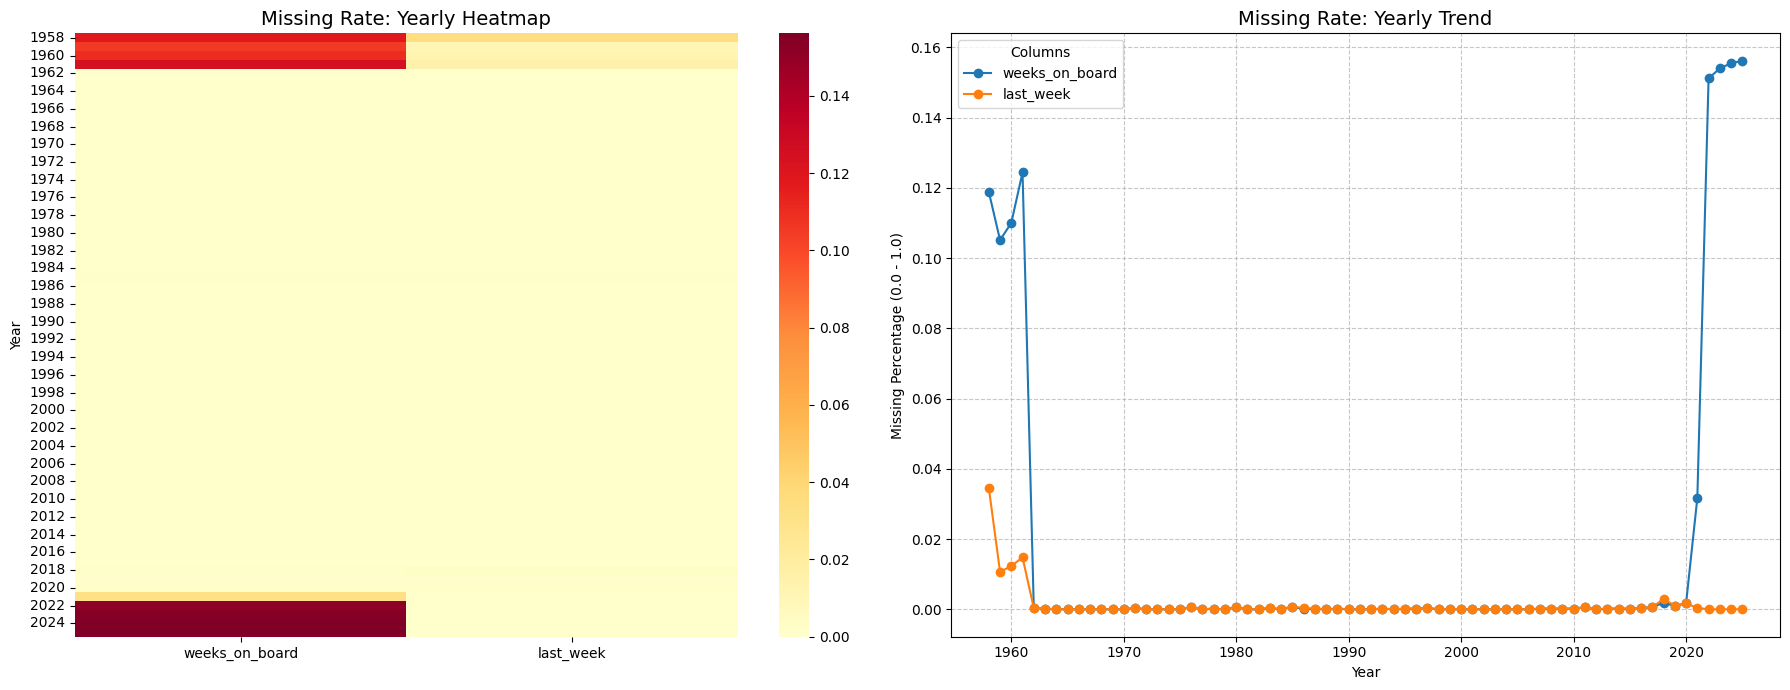

--- 缺失率较高的年份（前5名） ---
      weeks_on_board  last_week
year                           
2025        0.156190   0.000000
2024        0.155472   0.000000
2023        0.154038   0.000000
2022        0.151154   0.000000
1961        0.124412   0.014775


In [22]:
# billboard100 缺失值热力图与趋势
# billboard100 heatmap and trend
import os
file_path = '../output/batch_cleaned/billboard100_cleaned.csv'
if not os.path.exists(file_path):
    file_path = 'output/batch_cleaned/billboard100_cleaned.csv'

df = pd.read_csv(file_path)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

available_cols = [c for c in ['weeks_on_board', 'last_week'] if c in df.columns]
if not available_cols:
    print(f"警告：在数据集中未找到列 {['weeks_on_board', 'last_week']}")
else:
    missing_analysis = df.groupby('year')[available_cols].apply(lambda x: x.isnull().mean())
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    sns.heatmap(missing_analysis, cmap='YlOrRd', annot=False, ax=ax1)
    ax1.set_title('Missing Rate: Yearly Heatmap', fontsize=14)
    ax1.set_ylabel('Year')
    missing_analysis.plot(kind='line', marker='o', ax=ax2)
    ax2.set_title('Missing Rate: Yearly Trend', fontsize=14)
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Missing Percentage (0.0 - 1.0)')
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend(title='Columns')
    plt.tight_layout()
    plt.show()
    print("--- 缺失率较高的年份（前5名） ---")
    print(missing_analysis.sort_values(by=available_cols[0], ascending=False).head(5))


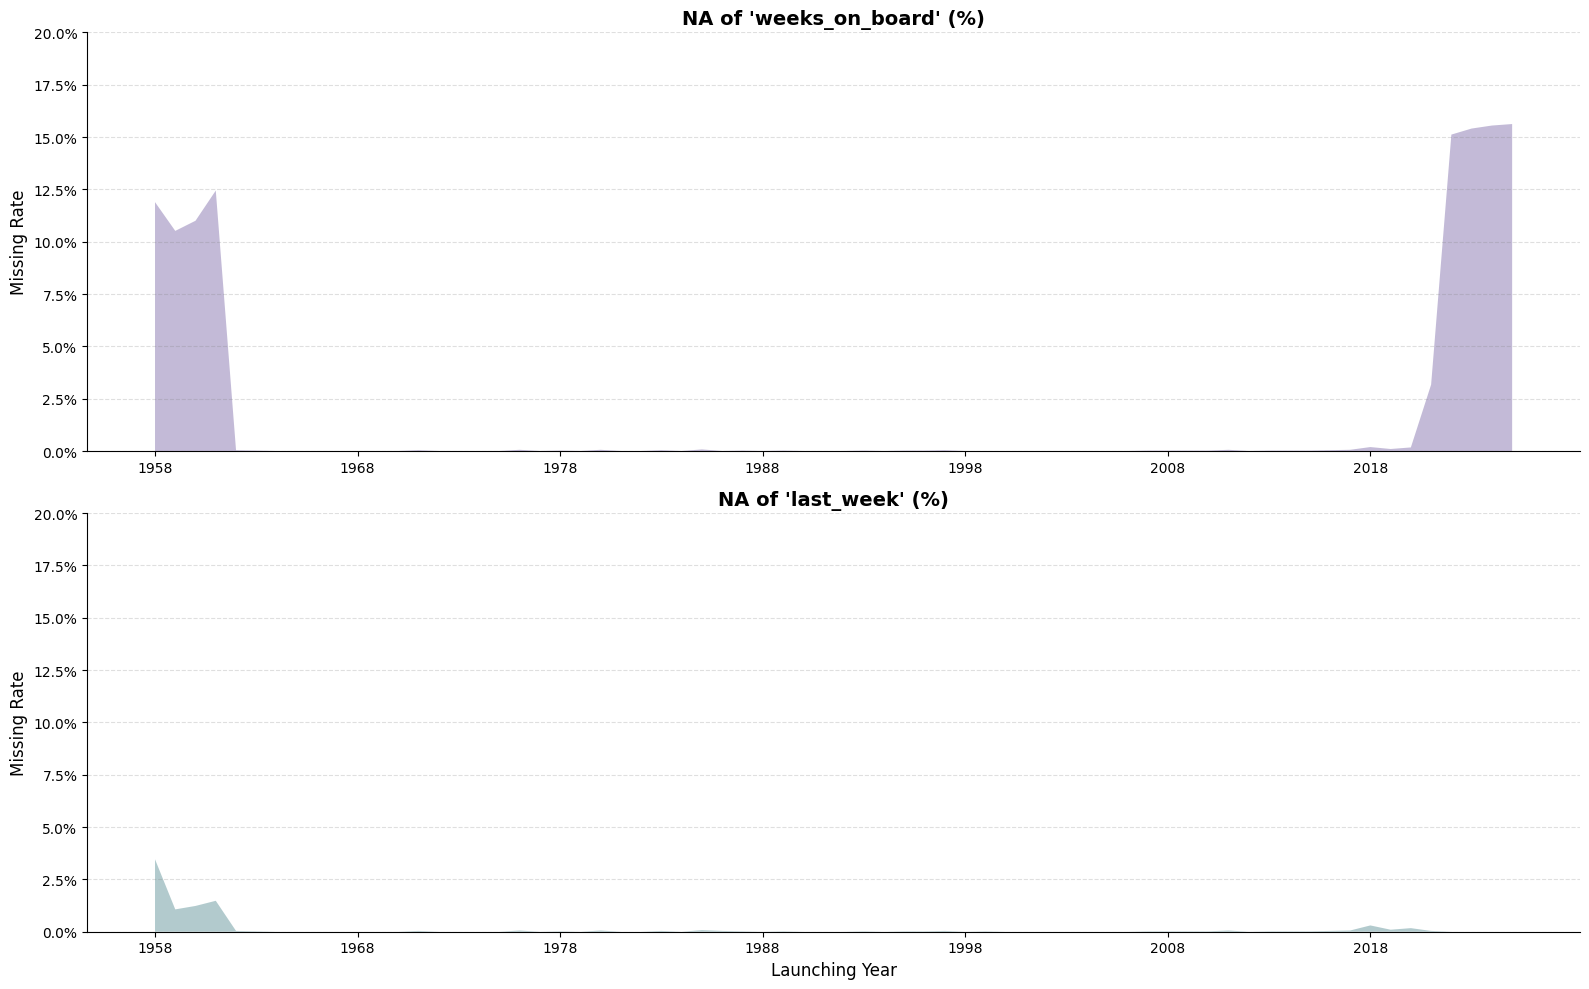

In [23]:
# billboard100 缺失率面积图
# billboard100 missing-rate area plot
file_path = '../output/batch_cleaned/billboard100_cleaned.csv'
df = pd.read_csv(file_path)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
missing_data = df.groupby('year')[['weeks_on_board', 'last_week']].apply(lambda x: x.isnull().mean())
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex=True)
color_weeks = '#9b8dbd'
color_last = '#7fa8ad'
ax1.fill_between(missing_data.index, missing_data['weeks_on_board'], color=color_weeks, alpha=0.6, edgecolor='none')
ax1.set_title("NA of 'weeks_on_board' (%)", loc='center', fontsize=14, fontweight='bold')
ax1.set_ylabel('Missing Rate', fontsize=12)
ax2.fill_between(missing_data.index, missing_data['last_week'], color=color_last, alpha=0.6, edgecolor='none')
ax2.set_title("NA of 'last_week' (%)", loc='center', fontsize=14, fontweight='bold')
ax2.set_ylabel('Missing Rate', fontsize=12)
ax2.set_xlabel('Launching Year', fontsize=12)
for ax in [ax1, ax2]:
    ax.set_ylim(0, 0.2)
    ax1.tick_params(labelbottom=True)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    ax.set_xticks(range(1958, 2026, 10))
plt.tight_layout()
plt.show()


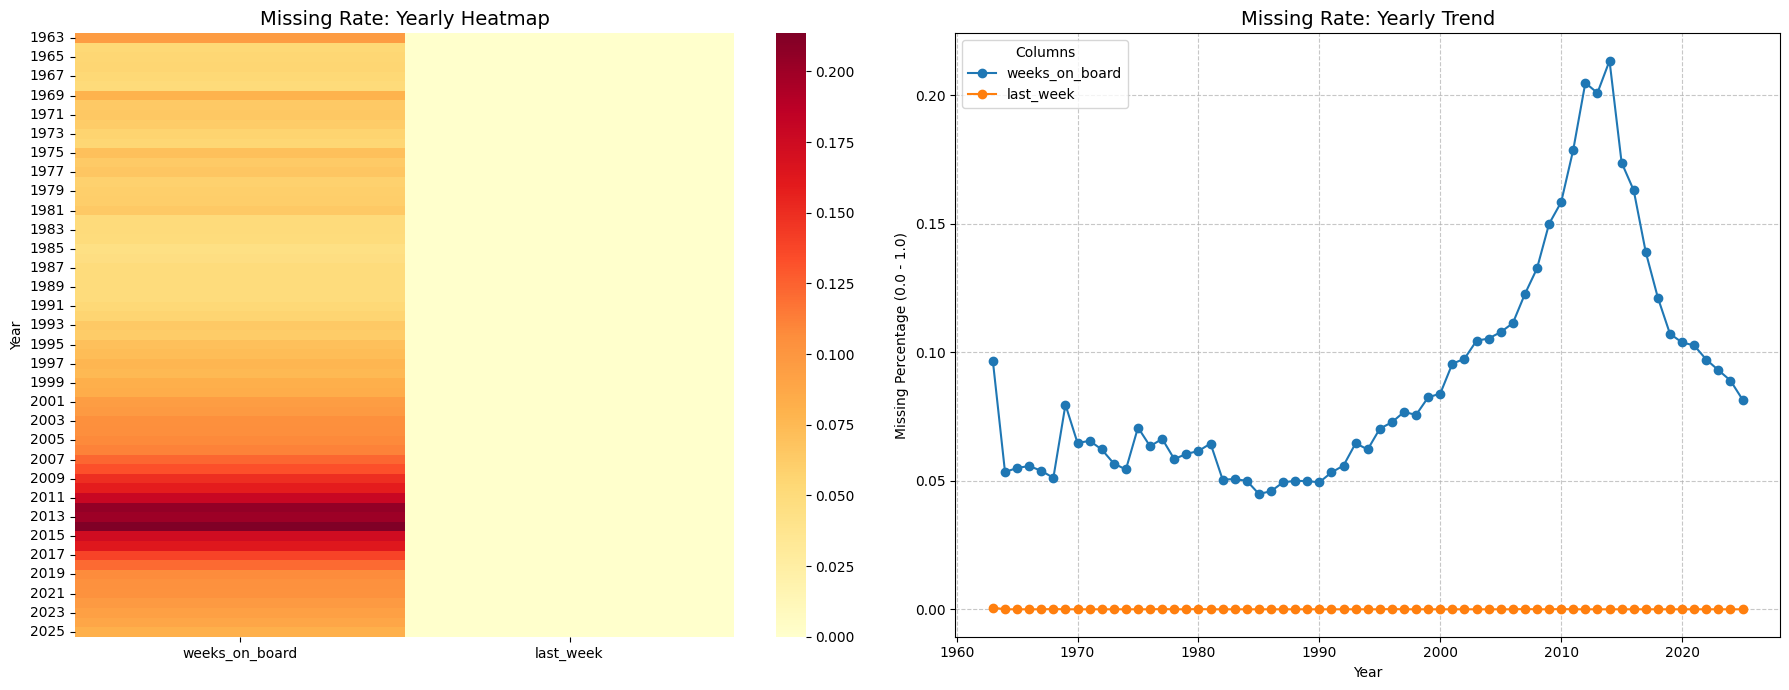

--- 缺失率较高的年份（前5名） ---
      weeks_on_board  last_week
year                           
2014        0.213491        0.0
2012        0.204904        0.0
2013        0.200962        0.0
2011        0.178846        0.0
2015        0.173846        0.0


In [24]:
# billboard200 缺失值热力图与趋势
# billboard200 heatmap and trend
import os
file_path = '../output/batch_cleaned/billboard200_cleaned.csv'
if not os.path.exists(file_path):
    file_path = 'output/batch_cleaned/billboard200_cleaned.csv'

df = pd.read_csv(file_path)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
available_cols = [c for c in ['weeks_on_board', 'last_week'] if c in df.columns]
if not available_cols:
    print(f"警告：在数据集中未找到列 {['weeks_on_board', 'last_week']}")
else:
    missing_analysis = df.groupby('year')[available_cols].apply(lambda x: x.isnull().mean())
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    sns.heatmap(missing_analysis, cmap='YlOrRd', annot=False, ax=ax1)
    ax1.set_title('Missing Rate: Yearly Heatmap', fontsize=14)
    ax1.set_ylabel('Year')
    missing_analysis.plot(kind='line', marker='o', ax=ax2)
    ax2.set_title('Missing Rate: Yearly Trend', fontsize=14)
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Missing Percentage (0.0 - 1.0)')
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend(title='Columns')
    plt.tight_layout()
    plt.show()
    print("--- 缺失率较高的年份（前5名） ---")
    print(missing_analysis.sort_values(by=available_cols[0], ascending=False).head(5))


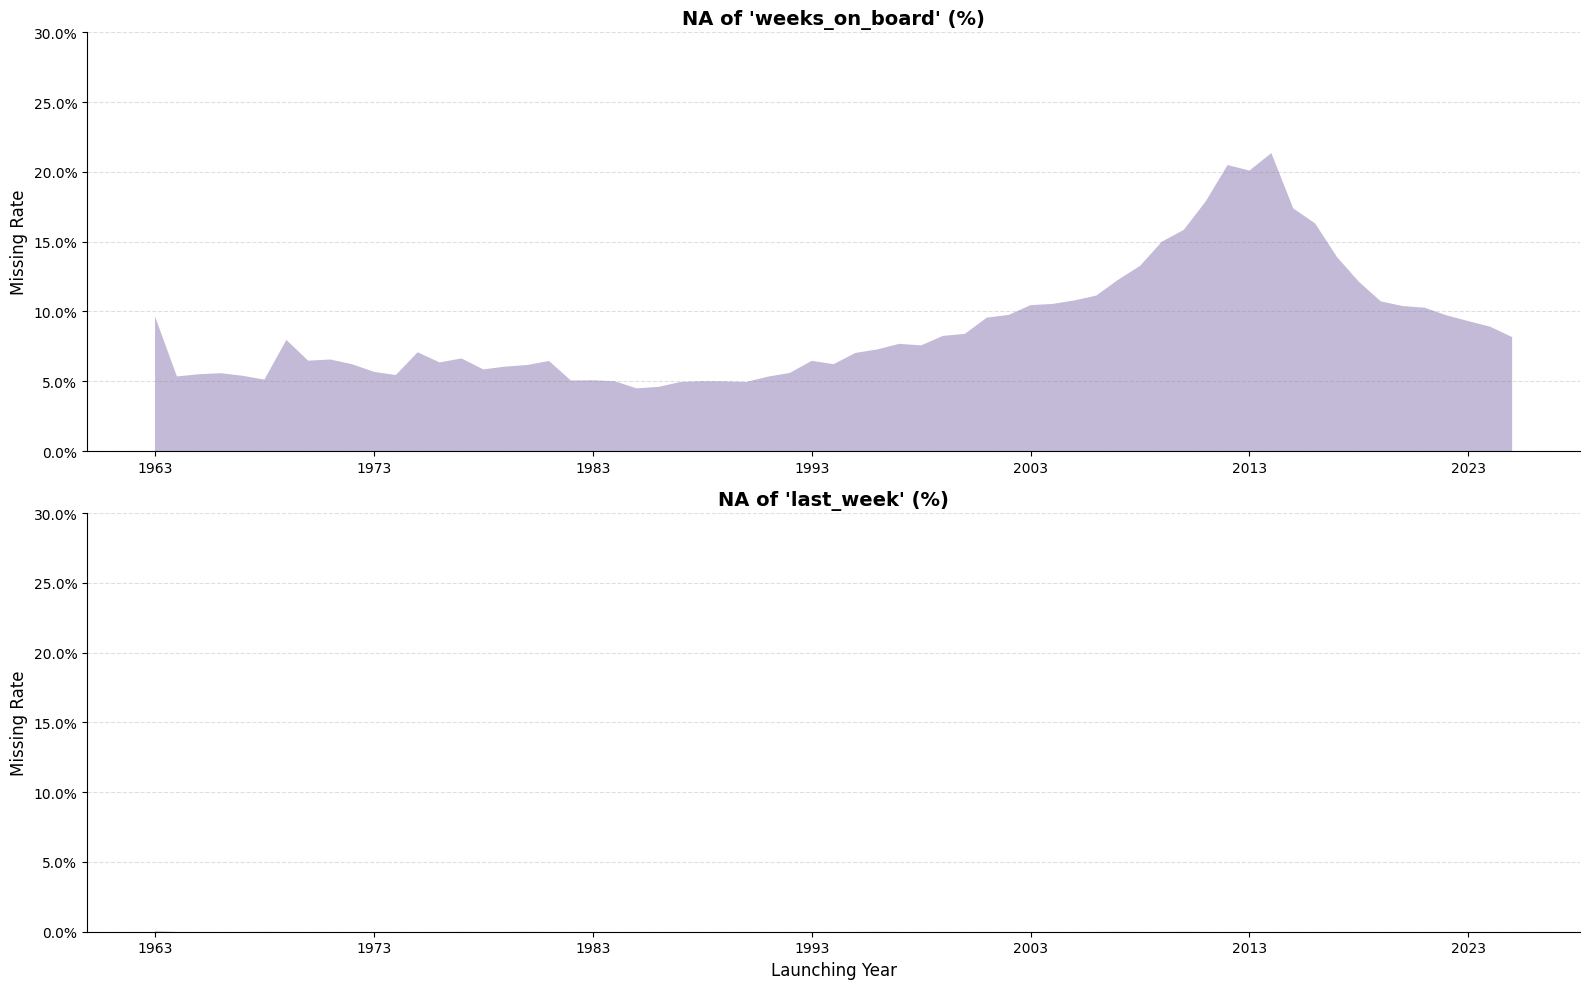

In [25]:
# billboard200 缺失率面积图
# billboard200 missing-rate area plot
file_path = '../output/batch_cleaned/billboard200_cleaned.csv'
df = pd.read_csv(file_path)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
missing_data = df.groupby('year')[['weeks_on_board', 'last_week']].apply(lambda x: x.isnull().mean())
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex=True)
color_weeks = '#9b8dbd'
color_last = '#7fa8ad'
ax1.fill_between(missing_data.index, missing_data['weeks_on_board'], color=color_weeks, alpha=0.6, edgecolor='none')
ax1.set_title("NA of 'weeks_on_board' (%)", loc='center', fontsize=14, fontweight='bold')
ax1.set_ylabel('Missing Rate', fontsize=12)
ax2.fill_between(missing_data.index, missing_data['last_week'], color=color_last, alpha=0.6, edgecolor='none')
ax2.set_title("NA of 'last_week' (%)", loc='center', fontsize=14, fontweight='bold')
ax2.set_ylabel('Missing Rate', fontsize=12)
ax2.set_xlabel('Launching Year', fontsize=12)
for ax in [ax1, ax2]:
    ax.set_ylim(0, 0.3)
    ax1.tick_params(labelbottom=True)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    ax.set_xticks(range(1963, 2026, 10))
plt.tight_layout()
plt.show()


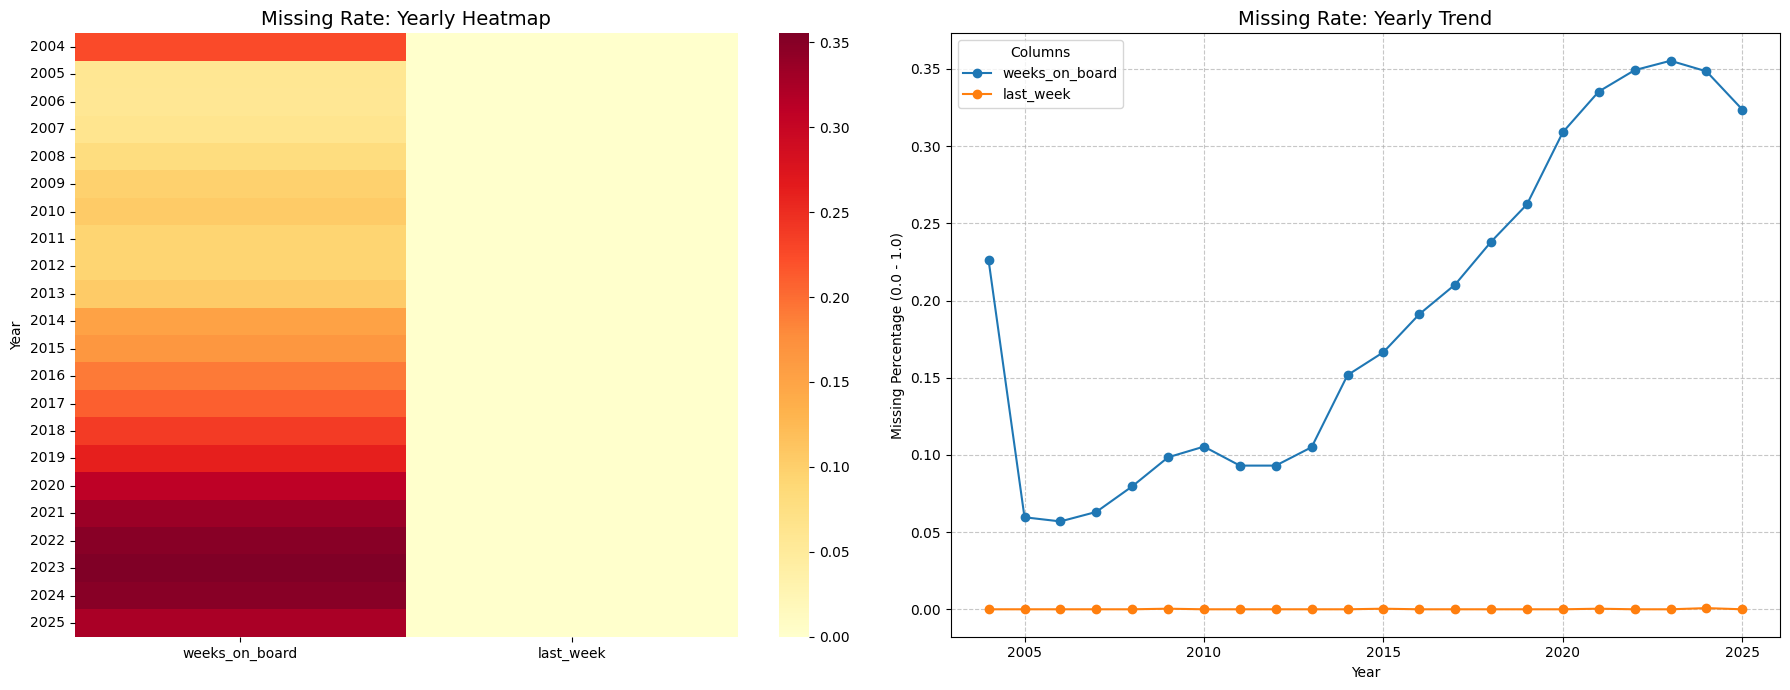

--- 缺失率较高的年份（前5名） ---
      weeks_on_board  last_week
year                           
2023        0.355319   0.000000
2022        0.349231   0.000000
2024        0.348462   0.000769
2021        0.335385   0.000385
2025        0.323721   0.000000


In [26]:
# digital_songs 缺失值热力图与趋势
# digital_songs heatmap and trend
import os
file_path = '../output/batch_cleaned/digital_songs_cleaned.csv'
if not os.path.exists(file_path):
    file_path = 'output/batch_cleaned/digital_songs_cleaned.csv'

df = pd.read_csv(file_path)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
available_cols = [c for c in ['weeks_on_board', 'last_week'] if c in df.columns]
if not available_cols:
    print(f"警告：在数据集中未找到列 {['weeks_on_board', 'last_week']}")
else:
    missing_analysis = df.groupby('year')[available_cols].apply(lambda x: x.isnull().mean())
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    sns.heatmap(missing_analysis, cmap='YlOrRd', annot=False, ax=ax1)
    ax1.set_title('Missing Rate: Yearly Heatmap', fontsize=14)
    ax1.set_ylabel('Year')
    missing_analysis.plot(kind='line', marker='o', ax=ax2)
    ax2.set_title('Missing Rate: Yearly Trend', fontsize=14)
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Missing Percentage (0.0 - 1.0)')
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend(title='Columns')
    plt.tight_layout()
    plt.show()
    print("--- 缺失率较高的年份（前5名） ---")
    print(missing_analysis.sort_values(by=available_cols[0], ascending=False).head(5))


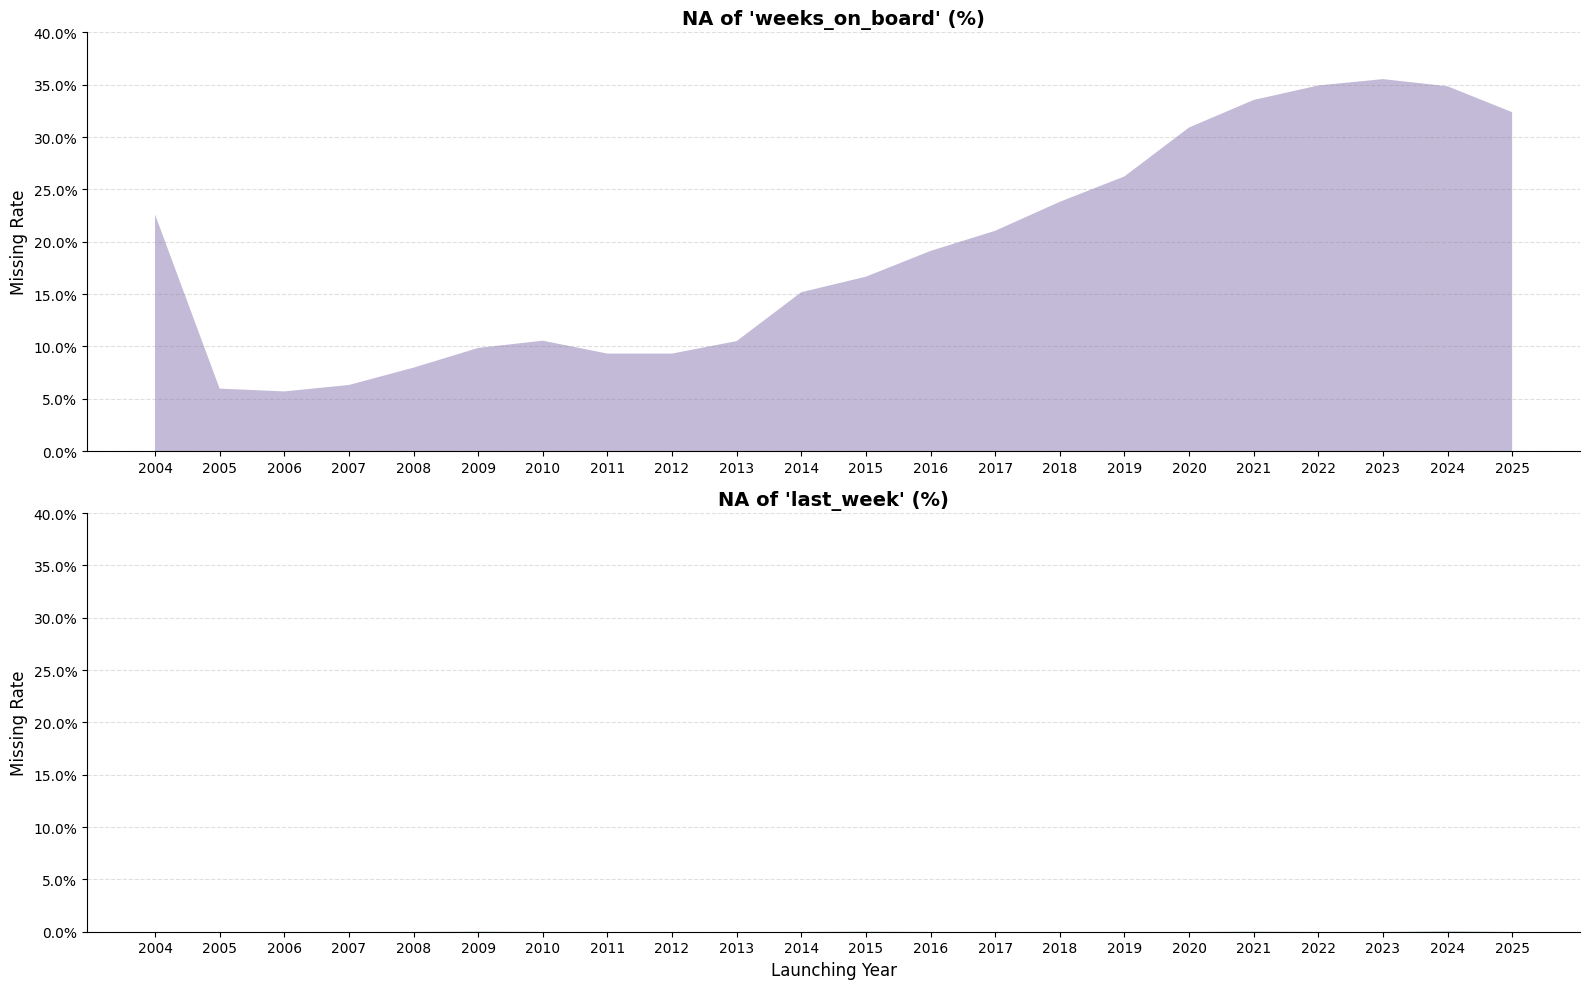

In [27]:
# digital_songs 缺失率面积图
# digital_songs missing-rate area plot
file_path = '../output/batch_cleaned/digital_songs_cleaned.csv'
df = pd.read_csv(file_path)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
missing_data = df.groupby('year')[['weeks_on_board', 'last_week']].apply(lambda x: x.isnull().mean())
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex=True)
color_weeks = '#9b8dbd'
color_last = '#7fa8ad'
ax1.fill_between(missing_data.index, missing_data['weeks_on_board'], color=color_weeks, alpha=0.6, edgecolor='none')
ax1.set_title("NA of 'weeks_on_board' (%)", loc='center', fontsize=14, fontweight='bold')
ax1.set_ylabel('Missing Rate', fontsize=12)
ax2.fill_between(missing_data.index, missing_data['last_week'], color=color_last, alpha=0.6, edgecolor='none')
ax2.set_title("NA of 'last_week' (%)", loc='center', fontsize=14, fontweight='bold')
ax2.set_ylabel('Missing Rate', fontsize=12)
ax2.set_xlabel('Launching Year', fontsize=12)
for ax in [ax1, ax2]:
    ax.set_ylim(0, 0.4)
    ax1.tick_params(labelbottom=True)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    ax.set_xticks(range(2004, 2026, 1))
plt.tight_layout()
plt.show()


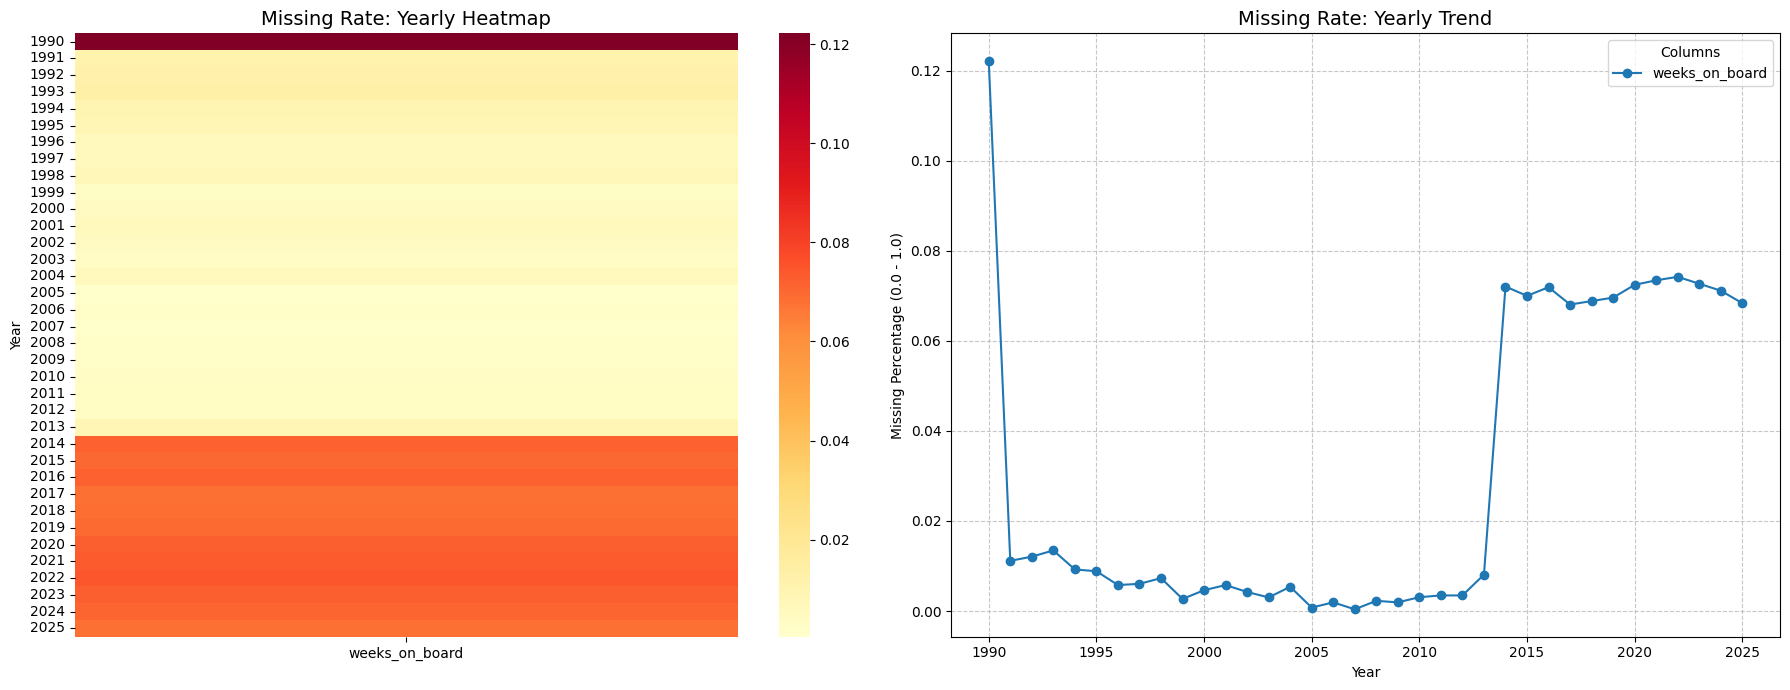

--- 缺失率较高的年份（前5名） ---
      weeks_on_board
year                
1990        0.122222
2022        0.074231
2021        0.073462
2023        0.072692
2020        0.072453


In [28]:
# radio 缺失值热力图与趋势
# radio heatmap and trend
import os
file_path = '../output/batch_cleaned/radio_cleaned.csv'
if not os.path.exists(file_path):
    file_path = 'output/batch_cleaned/radio_cleaned.csv'

df = pd.read_csv(file_path)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
available_cols = [c for c in ['weeks_on_board'] if c in df.columns]
if not available_cols:
    print(f"警告：在数据集中未找到列 {['weeks_on_board']}")
else:
    missing_analysis = df.groupby('year')[available_cols].apply(lambda x: x.isnull().mean())
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    sns.heatmap(missing_analysis, cmap='YlOrRd', annot=False, ax=ax1)
    ax1.set_title('Missing Rate: Yearly Heatmap', fontsize=14)
    ax1.set_ylabel('Year')
    missing_analysis.plot(kind='line', marker='o', ax=ax2)
    ax2.set_title('Missing Rate: Yearly Trend', fontsize=14)
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Missing Percentage (0.0 - 1.0)')
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend(title='Columns')
    plt.tight_layout()
    plt.show()
    print("--- 缺失率较高的年份（前5名） ---")
    print(missing_analysis.sort_values(by=available_cols[0], ascending=False).head(5))


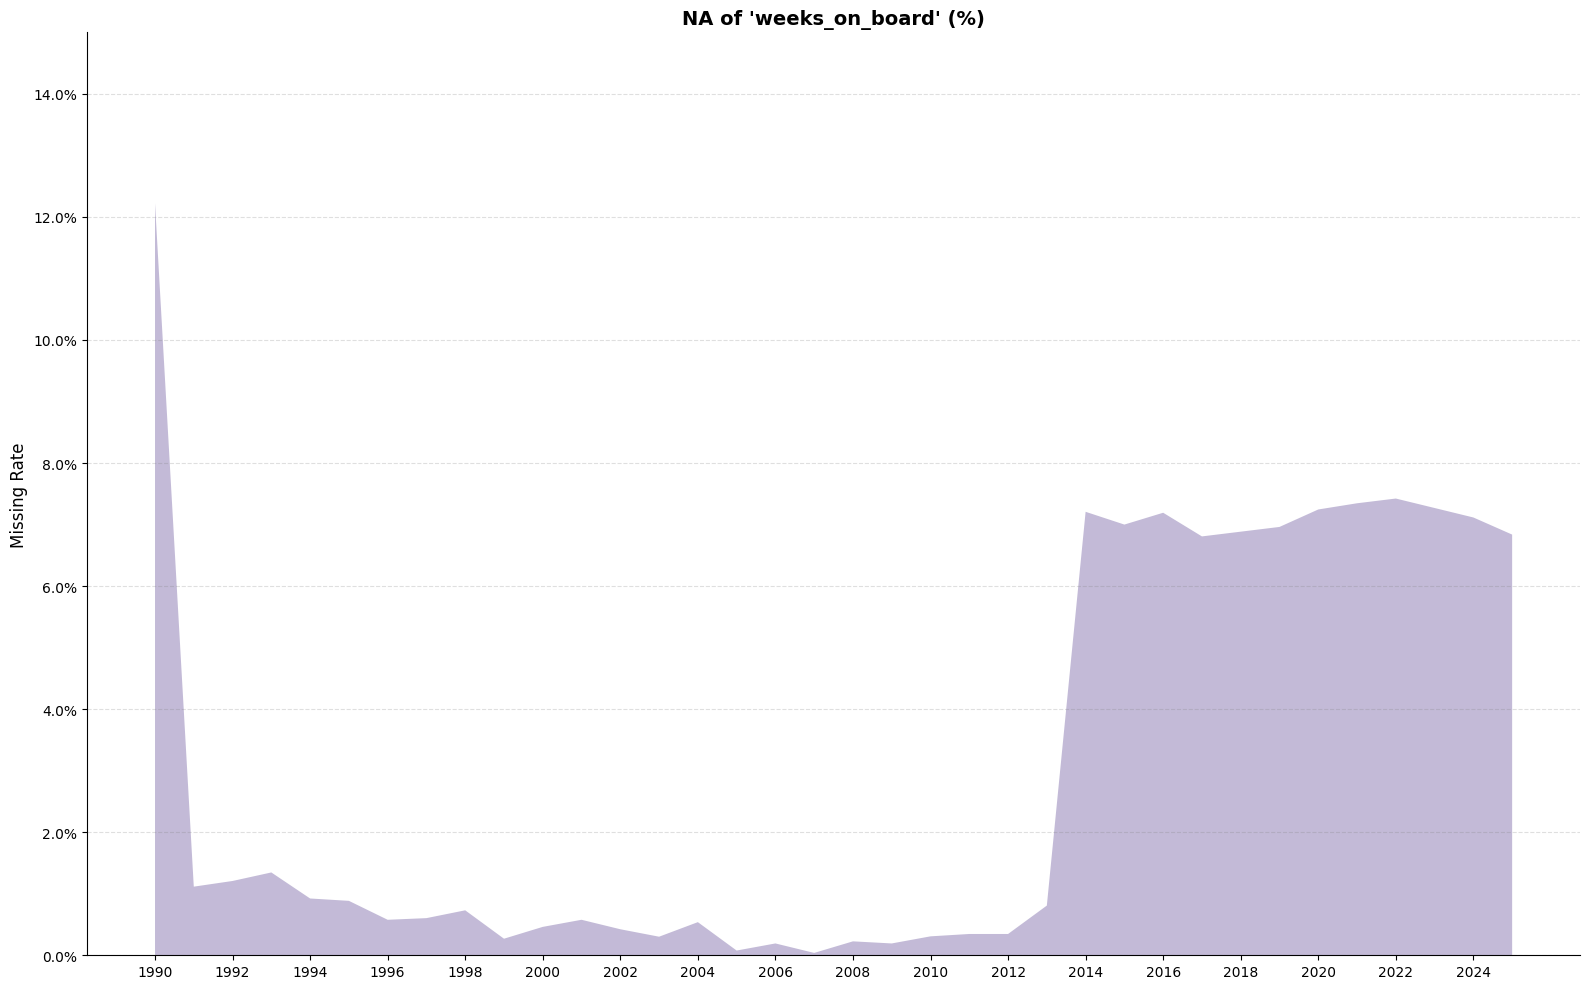

In [29]:
# radio 缺失率面积图
# radio missing-rate area plot
file_path = '../output/batch_cleaned/radio_cleaned.csv'
df = pd.read_csv(file_path)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
missing_data = df.groupby('year')[['weeks_on_board']].apply(lambda x: x.isnull().mean())
fig, ax1 = plt.subplots(1, 1, figsize=(16, 10), sharex=True)
color_weeks = '#9b8dbd'
ax1.fill_between(missing_data.index, missing_data['weeks_on_board'], color=color_weeks, alpha=0.6, edgecolor='none')
ax1.set_title("NA of 'weeks_on_board' (%)", loc='center', fontsize=14, fontweight='bold')
ax1.set_ylabel('Missing Rate', fontsize=12)
for ax in [ax1]:
    ax.set_ylim(0, 0.15)
    ax1.tick_params(labelbottom=True)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    ax.set_xticks(range(1990, 2026, 2))
plt.tight_layout()
plt.show()


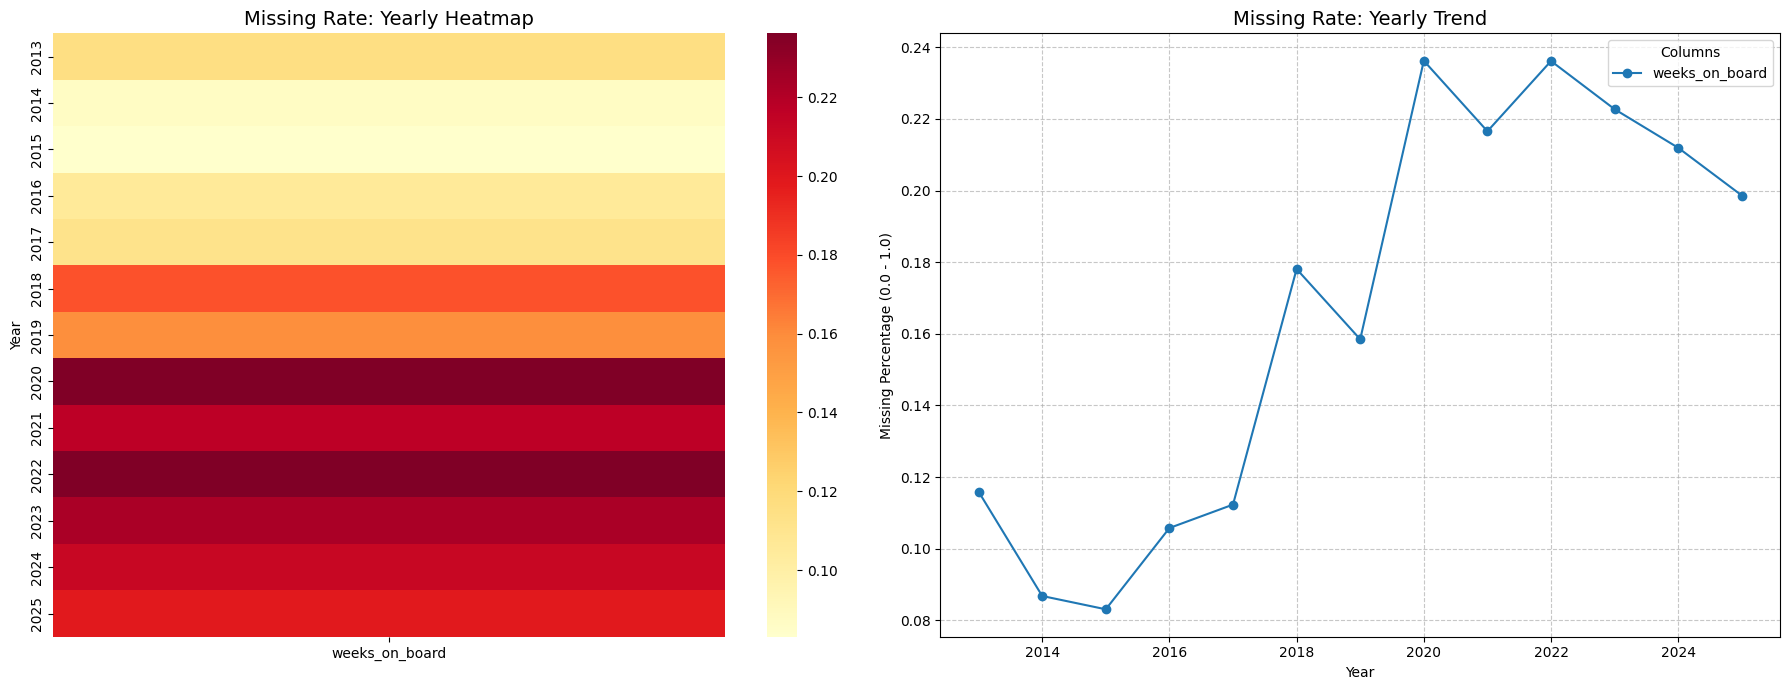

--- 缺失率较高的年份（前5名） ---
      weeks_on_board
year                
2020        0.236226
2022        0.236154
2023        0.222692
2021        0.216538
2024        0.211923


In [30]:
# streaming_songs 缺失值热力图与趋势
# streaming_songs heatmap and trend
import os
file_path = '../output/batch_cleaned/streaming_songs_cleaned.csv'
if not os.path.exists(file_path):
    file_path = 'output/batch_cleaned/streaming_songs_cleaned.csv'

df = pd.read_csv(file_path)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
available_cols = [c for c in ['weeks_on_board'] if c in df.columns]
if not available_cols:
    print(f"警告：在数据集中未找到列 {['weeks_on_board']}")
else:
    missing_analysis = df.groupby('year')[available_cols].apply(lambda x: x.isnull().mean())
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    sns.heatmap(missing_analysis, cmap='YlOrRd', annot=False, ax=ax1)
    ax1.set_title('Missing Rate: Yearly Heatmap', fontsize=14)
    ax1.set_ylabel('Year')
    missing_analysis.plot(kind='line', marker='o', ax=ax2)
    ax2.set_title('Missing Rate: Yearly Trend', fontsize=14)
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Missing Percentage (0.0 - 1.0)')
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend(title='Columns')
    plt.tight_layout()
    plt.show()
    print("--- 缺失率较高的年份（前5名） ---")
    print(missing_analysis.sort_values(by=available_cols[0], ascending=False).head(5))


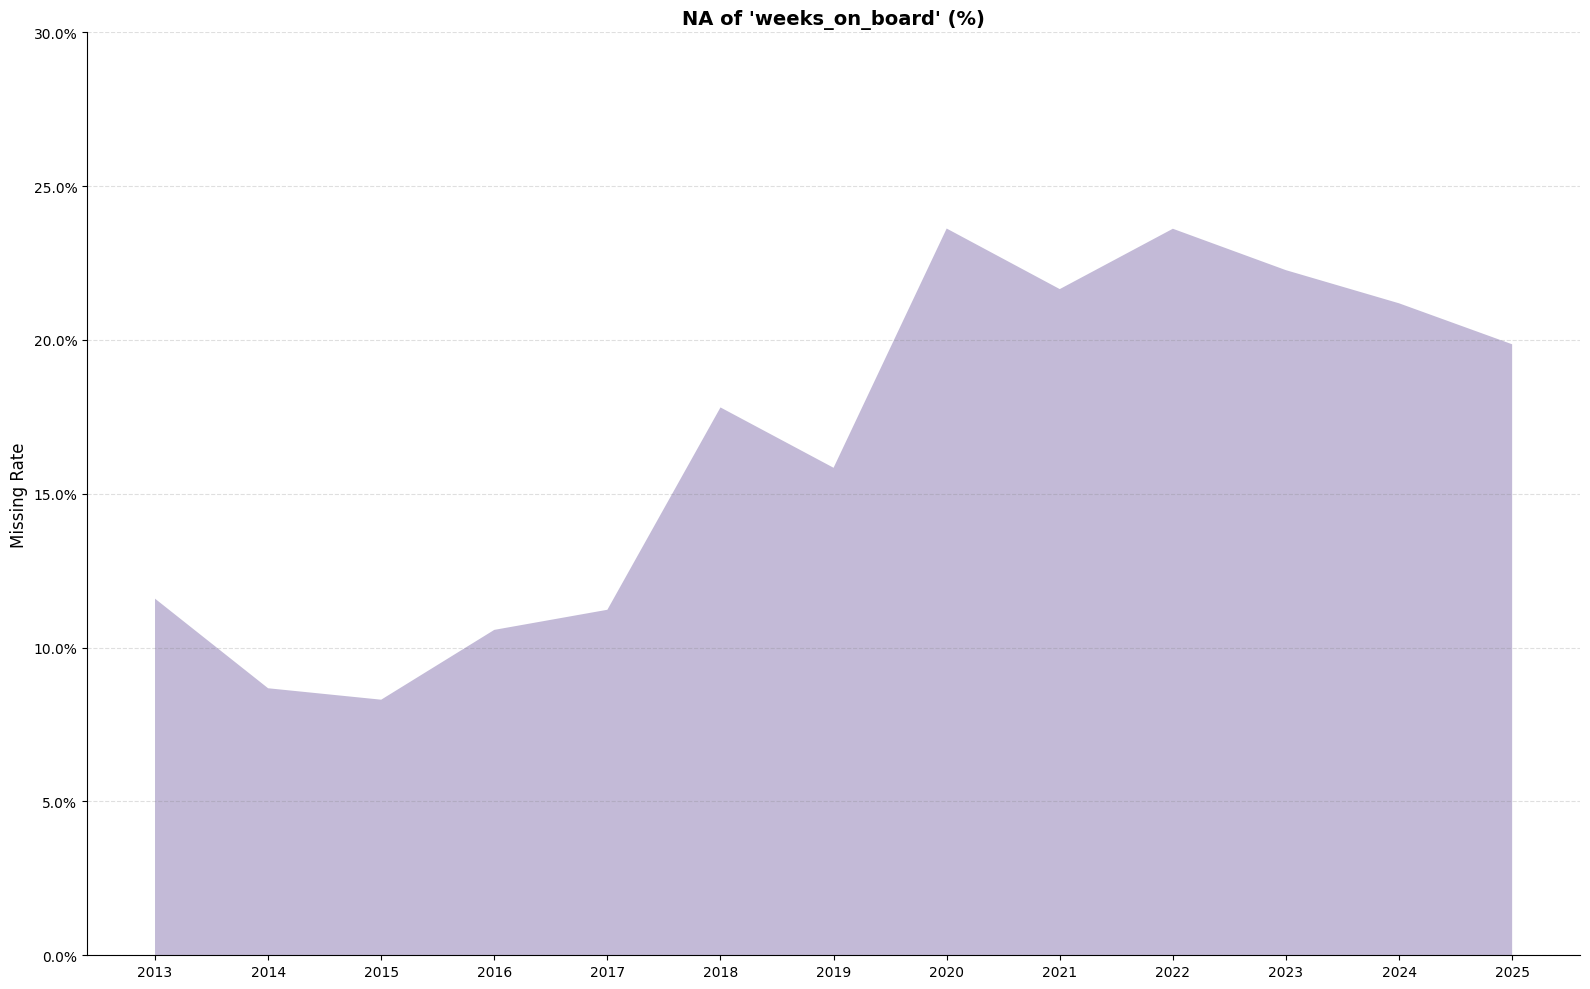

In [31]:
# streaming_songs 缺失率面积图
# streaming_songs missing-rate area plot
file_path = '../output/batch_cleaned/streaming_songs_cleaned.csv'
df = pd.read_csv(file_path)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
missing_data = df.groupby('year')[['weeks_on_board']].apply(lambda x: x.isnull().mean())
fig, ax1 = plt.subplots(1, 1, figsize=(16, 10), sharex=True)
color_weeks = '#9b8dbd'
ax1.fill_between(missing_data.index, missing_data['weeks_on_board'], color=color_weeks, alpha=0.6, edgecolor='none')
ax1.set_title("NA of 'weeks_on_board' (%)", loc='center', fontsize=14, fontweight='bold')
ax1.set_ylabel('Missing Rate', fontsize=12)
for ax in [ax1]:
    ax.set_ylim(0, 0.3)
    ax1.tick_params(labelbottom=True)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    ax.set_xticks(range(2013, 2026, 1))
plt.tight_layout()
plt.show()
